# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
# Size adjusted to 500 to avoid exceeding the 1,000 daily API call limit from OpenWeatherAPI
lats = np.random.uniform(lat_range[0], lat_range[1], size=500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 272


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weather_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json["coord"]["lat"]
        city_lng = city_weather_json["coord"]["lon"]
        city_max_temp = city_weather_json["main"]["temp_max"]
        city_humidity = city_weather_json["main"]["humidity"]
        city_clouds = city_weather_json["clouds"]["all"]
        city_wind = city_weather_json["wind"]["speed"]
        city_country = city_weather_json["sys"]["country"]
        city_date = city_weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | puerto natales
Processing Record 6 of Set 1 | isafjordur
Processing Record 7 of Set 1 | raduzhnyy
Processing Record 8 of Set 1 | puerto maldonado
Processing Record 9 of Set 1 | lehighton
Processing Record 10 of Set 1 | al bayda'
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | hamilton
Processing Record 14 of Set 1 | college
Processing Record 15 of Set 1 | whitehorse
Processing Record 16 of Set 1 | nuuk
Processing Record 17 of Set 1 | basco
Processing Record 18 of Set 1 | huilong
Processing Record 19 of Set 1 | hammerfest
Processing Record 20 of Set 1 | port mathurin
Processing Record 21 of Set 1 | enewetak
Processing Rec

Processing Record 14 of Set 12 | nsanje
Processing Record 15 of Set 12 | xuchang
Processing Record 16 of Set 12 | todos santos
Processing Record 17 of Set 12 | kuhestan
City not found. Skipping...
Processing Record 18 of Set 12 | bataipora
Processing Record 19 of Set 12 | tateyama
Processing Record 20 of Set 12 | wajima
Processing Record 21 of Set 12 | pokosnoye
Processing Record 22 of Set 12 | waipawa
Processing Record 23 of Set 12 | yaring
Processing Record 24 of Set 12 | isiro
Processing Record 25 of Set 12 | chivilcoy
Processing Record 26 of Set 12 | mandalgovi
Processing Record 27 of Set 12 | nicoya
Processing Record 28 of Set 12 | novocheremshansk
Processing Record 29 of Set 12 | emirdag
Processing Record 30 of Set 12 | nouadhibou
Processing Record 31 of Set 12 | tongliao
Processing Record 32 of Set 12 | ryomgard
Processing Record 33 of Set 12 | khudumelapye
Processing Record 34 of Set 12 | talcahuano
Processing Record 35 of Set 12 | gifhorn
Processing Record 36 of Set 12 | bilma

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          260
Lat           260
Lng           260
Max Temp      260
Humidity      260
Cloudiness    260
Wind Speed    260
Country       260
Date          260
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,285.96,72,90,6.20,SH,1716842280
1,punta arenas,-53.1500,-70.9167,274.21,93,75,3.09,CL,1716842170
2,waitangi,-43.9535,-176.5597,282.49,86,100,8.05,NZ,1716842280
3,puerto natales,-51.7236,-72.4875,273.40,100,75,1.03,CL,1716842280
4,isafjordur,66.0755,-23.1240,281.91,78,97,0.72,IS,1716842281


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,285.96,72,90,6.20,SH,1716842280
1,punta arenas,-53.1500,-70.9167,274.21,93,75,3.09,CL,1716842170
2,waitangi,-43.9535,-176.5597,282.49,86,100,8.05,NZ,1716842280
3,puerto natales,-51.7236,-72.4875,273.40,100,75,1.03,CL,1716842280
4,isafjordur,66.0755,-23.1240,281.91,78,97,0.72,IS,1716842281


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

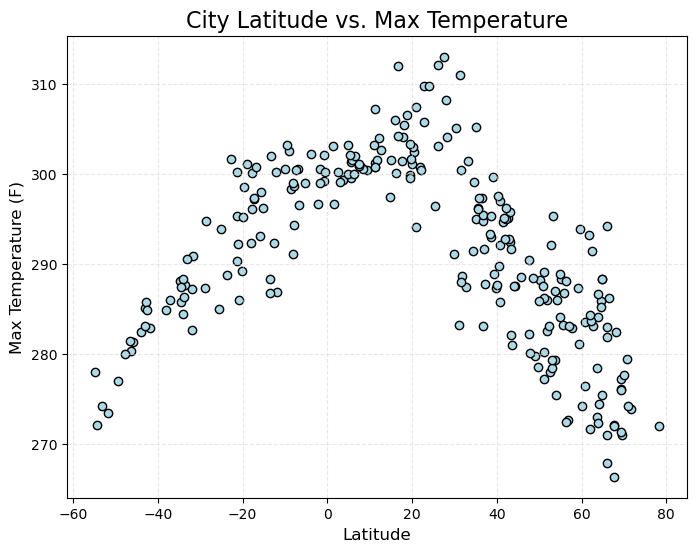

In [23]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, facecolor="lightblue", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Max Temperature (F)", fontsize=12)
plt.title("City Latitude vs. Max Temperature", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

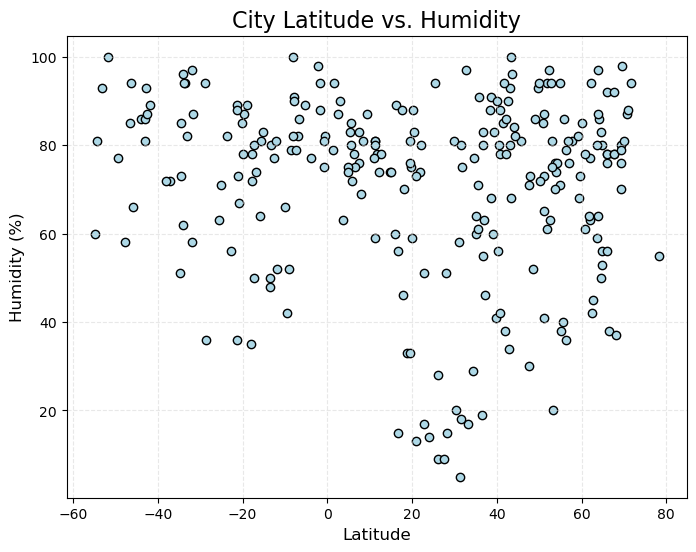

In [27]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, facecolor="lightblue", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Humidity (%)", fontsize=12)
plt.title("City Latitude vs. Humidity", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

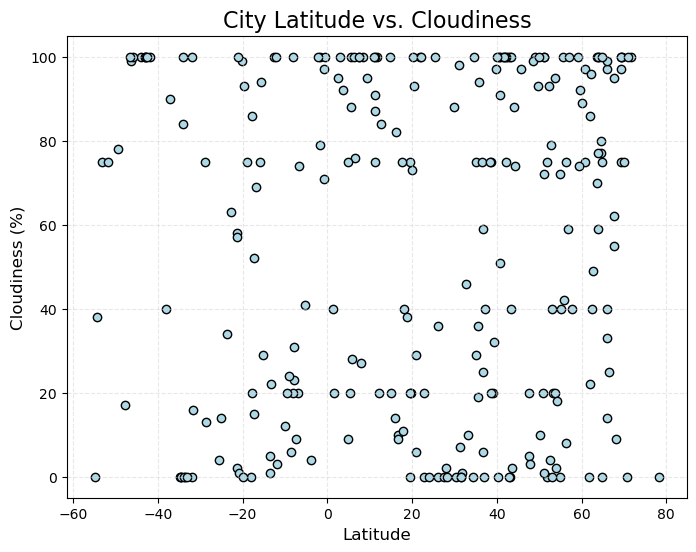

In [28]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, facecolor="lightblue", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness (%)", fontsize=12)
plt.title("City Latitude vs. Cloudiness", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

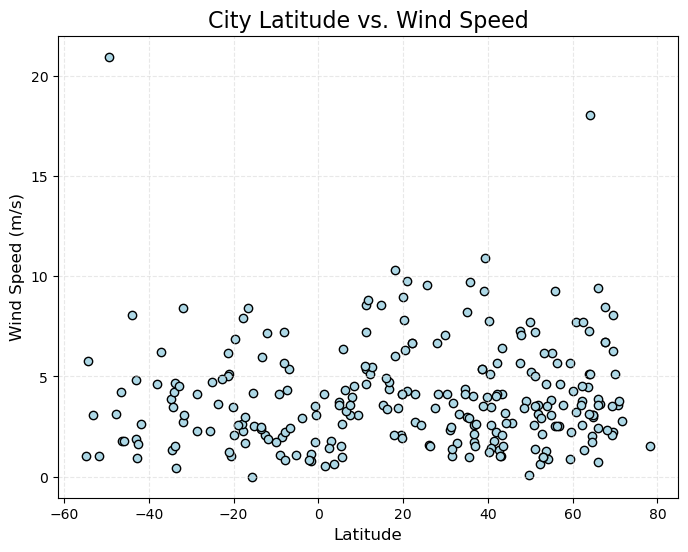

In [29]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, facecolor="lightblue", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed (m/s)", fontsize=12)
plt.title("City Latitude vs. Wind Speed", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [24]:
# Define a function to create Linear Regression plots
def linregress_plot (x, y, x_label, y_label):
    # Plot values
    x_values = x
    y_values = y
    
    # Linear regression values
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Identify location for plot annotation - Middle of X and Upper half of Y
    anno_x = x_values.min() + 0.5 * (x_values.max() - x_values.min())
    anno_y = y_values.min() + 0.8 * (y_values.max() - y_values.min())

    # Create the plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values, "r-")
    plt.annotate(line_eq, (anno_x, anno_y), fontsize=15, color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"The r-value is: {rvalue}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,isafjordur,66.0755,-23.1240,281.91,78,97,0.72,IS,1716842281
5,raduzhnyy,62.0961,77.4750,271.68,77,86,3.80,RU,1716842281
7,lehighton,40.8337,-75.7138,297.05,88,100,2.57,US,1716842143
8,al bayda',32.7627,21.7551,287.44,97,46,1.70,LY,1716842281
11,hamilton,39.1834,-84.5333,299.69,60,20,9.26,US,1716842046


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,285.96,72,90,6.20,SH,1716842280
1,punta arenas,-53.1500,-70.9167,274.21,93,75,3.09,CL,1716842170
2,waitangi,-43.9535,-176.5597,282.49,86,100,8.05,NZ,1716842280
3,puerto natales,-51.7236,-72.4875,273.40,100,75,1.03,CL,1716842280
6,puerto maldonado,-12.6000,-69.1833,292.37,77,100,2.06,PE,1716842190


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8247160645797172


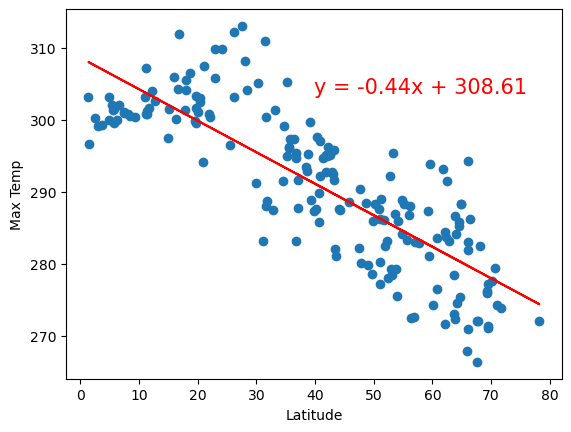

In [25]:
# Linear regression on Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temp")

The r-value is: 0.8724001766495764


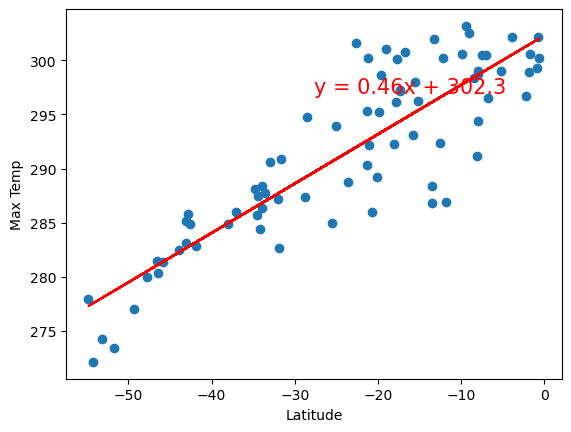

In [26]:
# Linear regression on Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temp")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.0066953580815822325


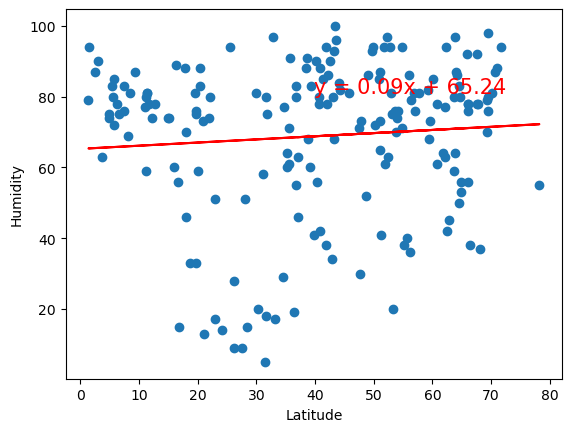

In [17]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity")

The r-squared is: 0.005263882231844097


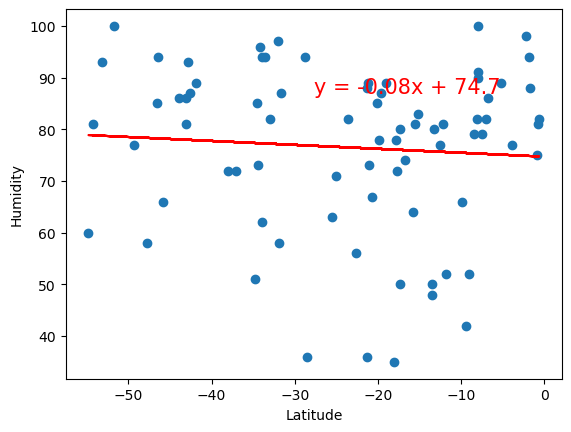

In [18]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0022936746155638346


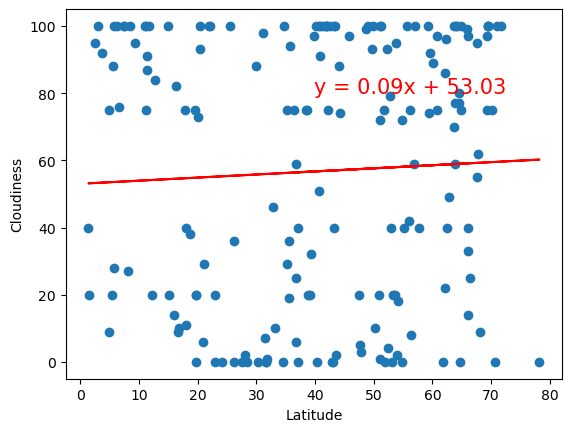

In [19]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness")

The r-squared is: 0.01357942804215584


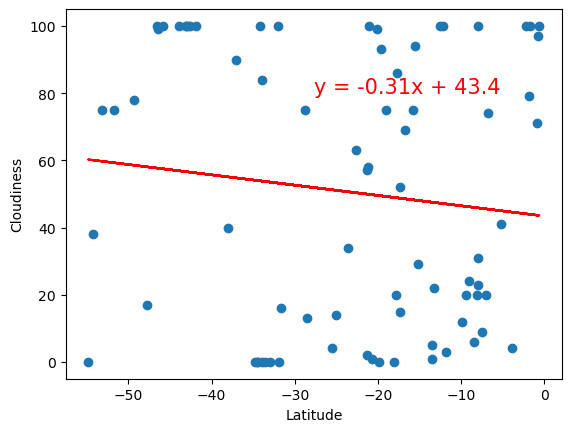

In [20]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.00019263556013727505


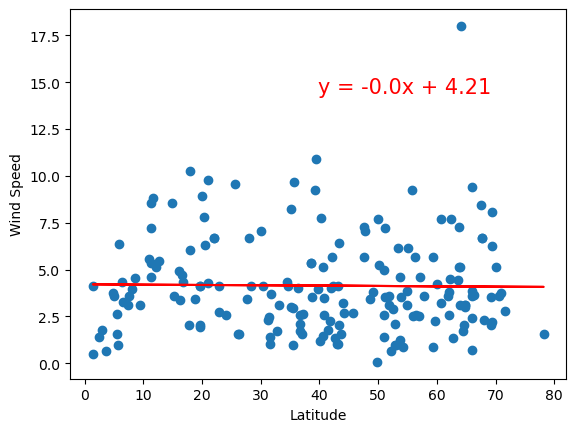

In [21]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed")

The r-squared is: 0.03120340248271187


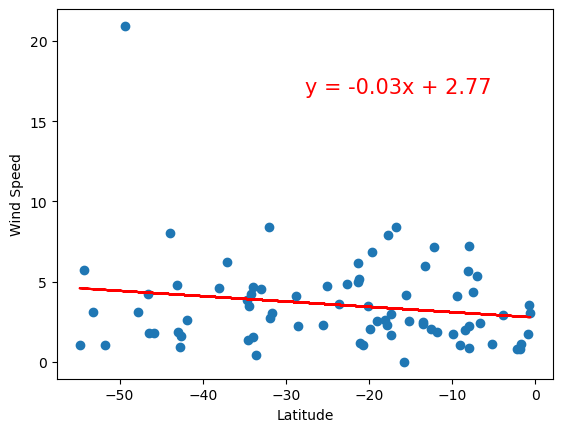

In [22]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed")

**Discussion about the linear relationship:** YOUR RESPONSE HERE